# Домашнее задание 6

Это домашнее задание по материалам второго семинаров. Дедлайн по отправке - 23:55 24 марта. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_6

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим задачу минимизации:
\begin{equation}
\min_{x \in \mathbb{R}^d} f(x) = \frac{1}{2}x^T A x - b^T x,
\end{equation}
где в качестве матрицы $A$ - случайная матрица с $L =1000$, $\mu = 1$, $d = 100$, $b$ - так же случайный вектор.

__(а)__ Для такой задачи симулируем итерацию координатного спуска (смотри семинар). 

Для такого метода подберите шаг $\gamma$ для наилучшей сходимости постройте график сходимости (по оси $y$ - критерий $\| \nabla f(x^k)\|^2$, а по оси $x$ - число арифмитических операций при подсчете "градиента"). Постройте на этом же графике сходимость честного градиентного спуска c наилучшим шагом сходимости. Сделайте вывод о характере сходимости нового метода.

In [126]:
import my_optimization as opt
import numpy as np
from importlib import reload

In [127]:
n_iter = 10000

args = {}
args['L'] = 1000
args['mu'] = 1
args['d'] = 100

args['A'] = opt.gen_A(args['d'], args['mu'], args['L'])
args['b'] = np.random.uniform(-50, 50, args['d'])
x_0 = np.ones(args['d'])

args['n'] = 1 #the variable not to have a mistake because of initialization in saga method

CSGD 

$$ \gamma_{th} = \frac{c}{4Ld}, c \in \{1, 300, 500, 600, 700, 800 \}$$

GD
$$\gamma_{th} = \frac{1}{L}$$

Method of calculating the number of operations
- From the function f_quad_grad_j from opt we understand that the number of the number of arithmetic operations is $d$#times of calling f_quad_grad_j
'''

In [128]:
#gamma fitting
def csgd_gamma_th(k, f, grad_f, x_k, x_true, args):
    return args['c']/(4 * args['L'] * args['d'])

def gd_gamma_th(k, f, grad_f, x_k, x_true, args):
    return 1/args['L']

100%|██████████| 10000/10000 [00:00<00:00, 26123.16it/s]


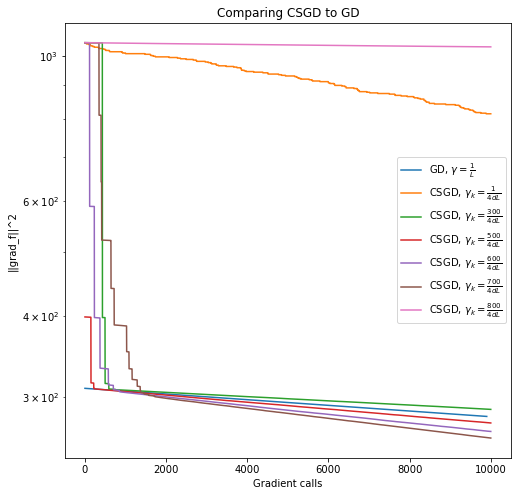

In [129]:
#optimizing
x, y, label = [], [], []
gd_grad_call_per_iter = args['d']
gd_n_iter = n_iter // gd_grad_call_per_iter

csgd_grad_call_per_iter = 1
csgd_n_iter = n_iter // csgd_grad_call_per_iter

#gd optimizing
gd_gamma_theory = opt.GradientOptimizer(opt.f_quad, opt.f_quad_grad, x_0, criterium = '||grad_f(x_k)||', 
                    args = args, n_iter = gd_n_iter, gamma_k = gd_gamma_th)
gd_points_arr, gd_differences_arr, gd_times_arr, acc_arr = gd_gamma_theory.descent()

gd_grad_calls = [i*gd_grad_call_per_iter for i in range(gd_n_iter)]

x.append(gd_grad_calls)
y.append(gd_differences_arr)
label.append(r"GD, $\gamma = \frac{1}{L}$")

#csgd optimizing
c_arr = [1, 300, 500, 600, 700, 800]
for args['c'] in c_arr:
    operations_csgd, csgd_differences_arr = [], []
    csgd_gamma_theory = opt.GradientOptimizer(opt.f_quad, opt.f_quad_grad, x_0, 
                                criterium = '||grad_f(x_k)||', args = args, n_iter = csgd_n_iter,
                gamma_k = csgd_gamma_th, csgd_activate = True, grad_f_j = opt.f_quad_grad_j)

    csgd_points_arr, csgd_differences_arr, csgd_times_arr, csgd_acc_arr = csgd_gamma_theory.descent()
    csgd_grad_calls = [i*csgd_grad_call_per_iter for i in range(csgd_n_iter)]
    
    x.append(csgd_grad_calls)
    y.append(csgd_differences_arr)
    label.append(r"CSGD, $\gamma_k = \frac{%i}{4dL}$" % args['c'])
    
opt.plot_graphs(x, y, "Gradient calls", label, "Comparing CSGD to GD", logscale = True, criteria_type = "||grad_f||^2")

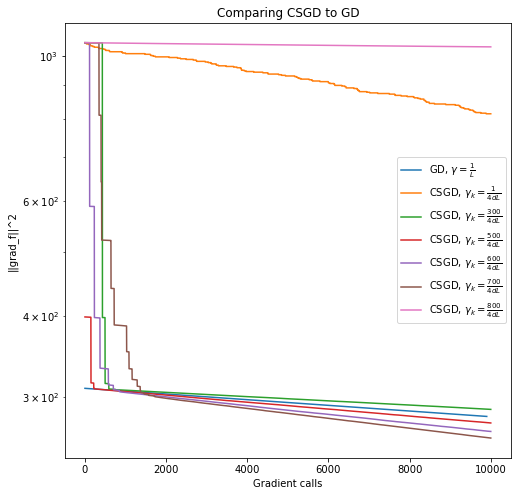

In [130]:
opt.plot_graphs(x, y, "Gradient calls", label, "Comparing CSGD to GD", logscale = True, criteria_type = "||grad_f||^2")

### Result
CSGD with $\gamma = 700$ turned out to be the best algorithm, so I'll use this model.

__(б)__ В координатном спуске можно брать несколько координат вместо одной. Модифицируйте координнатный спуск, исходя из этого, пробуя разное число координат $b = 1, 5, 10, 20$, а также разные способы сэмплирования: все координатны независимо или зависимо, чтобы не было повторений в батче. Постройте графики аналогичные пункту (а). Сделайте вывод.

In [131]:
x, y, label = [], [], [] 

#csgd optimizing
args['c'] = 700
n_coord_arr = [1, 5, 10, 20]

for n_coord in n_coord_arr:
    #gradient calls calculations
    csgd_grad_call_per_iter = n_coord
    csgd_n_iter = n_iter // csgd_grad_call_per_iter
    csgd_grad_calls = [i*csgd_grad_call_per_iter for i in range(csgd_n_iter)]
    
    #dependent
    csgd_gamma_ind = opt.GradientOptimizer(opt.f_quad, opt.f_quad_grad, x_0, 
                                              criterium = '||grad_f(x_k)||', args = args, 
                                              n_iter = csgd_n_iter, gamma_k = csgd_gamma_th, 
                                              csgd_activate = True, grad_f_j = opt.f_quad_grad_j,
                                             is_independent = False, n_coord = n_coord)

    csgd_ind_points_arr, csgd_ind_differences_arr, csgd_ind_times_arr, csdg_ind_acc_arr = csgd_gamma_ind.descent()

    x.append(csgd_grad_calls)
    y.append(csgd_ind_differences_arr)
    label.append(r"Independent CSGD, $n_{coord} = %i$" % n_coord)
            
    #independent
    csgd_gamma_dep = opt.GradientOptimizer(opt.f_quad, opt.f_quad_grad, x_0, 
                                              criterium = '||grad_f(x_k)||', args = args, 
                                              n_iter = csgd_n_iter, gamma_k = csgd_gamma_th, 
                                              csgd_activate = True, grad_f_j = opt.f_quad_grad_j,
                                             is_independent = True, n_coord = n_coord)
    
    csgd_dep_points_arr, csgd_dep_differences_arr, csgd_dep_times_arr, csdg_dep_acc_arr = csgd_gamma_dep.descent()
    x.append(csgd_grad_calls)
    y.append(csgd_dep_differences_arr)
    label.append(r"Dependent CSGD, $n_{coord} = %i$" % n_coord)    
    
#gd optimizing
gd_gamma_theory = opt.GradientOptimizer(opt.f_quad, opt.f_quad_grad, x_0, criterium = '||grad_f(x_k)||', 
args = args, n_iter = gd_n_iter, gamma_k = gd_gamma_th, is_independent = True)
gd_points_arr, gd_differences_arr, gd_times_arr, gd_acc_arr = gd_gamma_theory.descent()
x.append(gd_grad_calls)
y.append(gd_differences_arr)
label.append(r"GD, $\gamma = \frac{1}{L}$")

100%|██████████| 100/100 [00:00<00:00, 11259.27it/s]


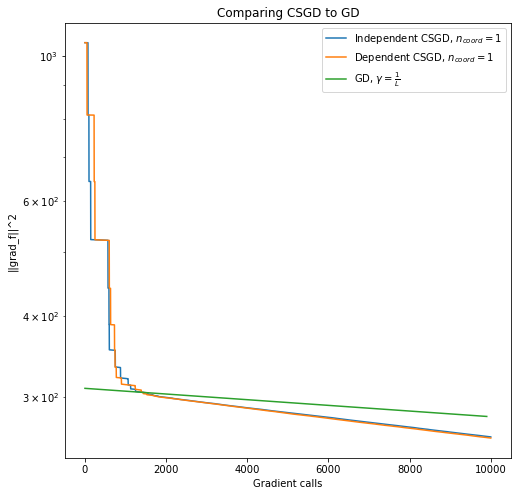

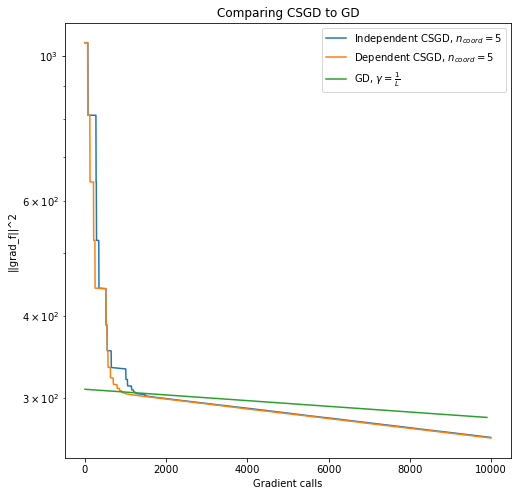

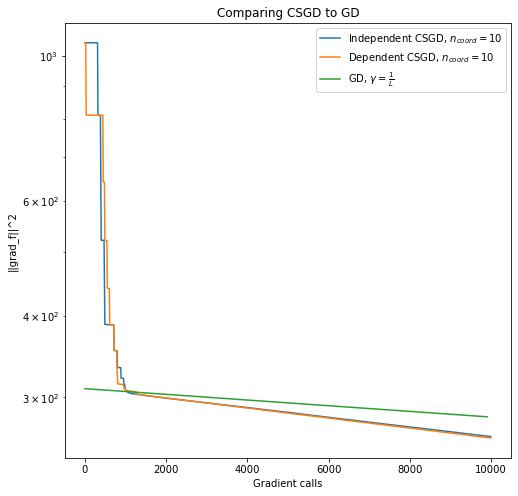

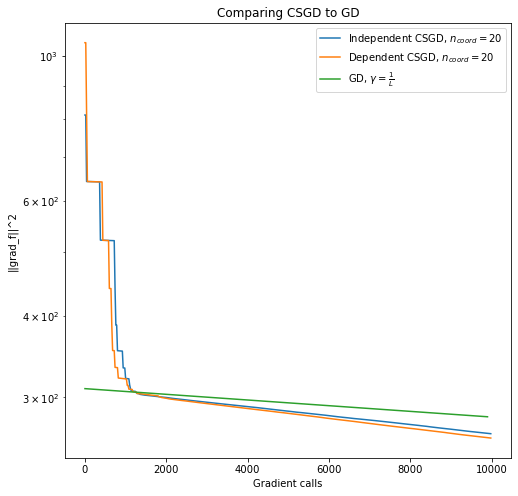

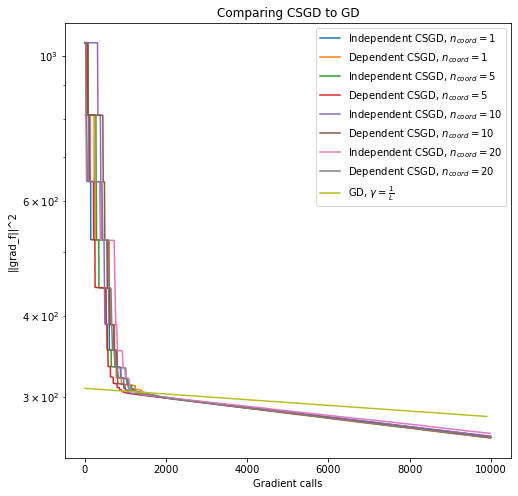

In [132]:
for i in range(0, len(c_arr) + 1, 2):
    opt.plot_graphs(x, y, "Gradient calls", label, "Comparing CSGD to GD", logscale = True, 
                    criteria_type = "||grad_f||^2", specific_slice = [i, i + 1, -1])

opt.plot_graphs(x, y, "Gradient calls", label, "Comparing CSGD to GD", logscale = True, criteria_type = "||grad_f||^2")

We can see that the method works better when the number of coordinates is more, but the time is inscreasing, so from now on we will have $n_{coord} = 20$ and when coordinates are independent (by this I mean that they are "permutated")

## Задача 2

Рассмотрим задачу линейной регрессии на датасете mushrooms с $\ell_2$-регуляризацией (коэффициент регуляризации равен $\frac{L}{1000}$). 

__(а)__ Оцените $\mu$ и $L$ для данной задачи. 

Linear regression: $\min_{w \in \mathbb{R}^d} f(w) := \dfrac{1}{n} \left\|Xw - y\right\|_2^2$

Also, $\nabla^2f(w) = \dfrac{2}{n} X^TX, \quad b = \dfrac{2}{n}X^Ty$

$\mu \leq \lambda_{\min}\left(\dfrac{2}{n} X^TX\right)$,

$L \geq \lambda_{\max}\left(\dfrac{2}{n} X^TX\right)$

In [133]:
#Data Preprocessing
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy.linalg
import numpy as np
from numpy import linalg

dataset = "mushrooms.txt"

data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]

y = 2*y - 3

args['n'], args['d'] = X.shape[0], X.shape[1] 

X_train, args['X_test'], y_train,  args['y_test'] = train_test_split(X, y, test_size=0.2, random_state=True)

args['X'] = X_train
args['y'] = y_train
w_0 = np.random.sample(args['d'])

args['A'] = (2 / args['n']) * args['X'].T @ args['X']
args['b'] = (2 / args['n']) * args['X'].T @ args['y']

args['mu'], args['L'] = np.min(linalg.eigvals(args['A'])), np.max(linalg.eigvals(args['A']))

def acc(k, f, grad_f, x_k, x_true, args):
    corr_count = 0
    test_count = len(args['y_test'])
    for i in range(test_count):
        if args['X_test'][i].dot(x_k) * args['y_test'][i] > 0:
            corr_count += 1
    return corr_count / test_count

args['lambda'] = args['L'] / 1000

print(args['mu'], args['L'])

(-6.842727571232313e-15+0j) (16.568418117502777+0j)


In [134]:
def f(x, args):
    return 1./2 * x.T @ args['A'] @ x - args['b'] @ x

def grad_f(x, args):
    return args['A'] @ x - args['b']

def grad_f_j(x, j, args):
    return args['A'][j] @ x - args['b'][j]

$\mu$ came out to be small negative due to the computational errors, so we can consider it to be 0

__(б)__ Реализуйте координатный SGD, SEGA для задачи линейно регрессии. Каким будете брать $b$? Как будете выбирать шаг и другие параметры методов?

100%|██████████| 500/500 [00:03<00:00, 128.51it/s]


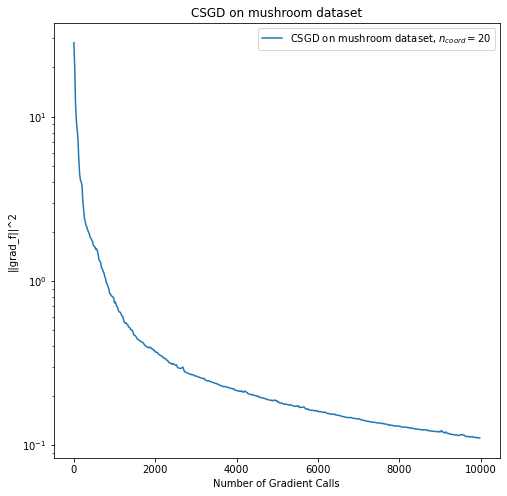

In [135]:
#csgd
n_iter = 10000
x, y, label = [], [], []
n_coord = 20

def gamma_csgd(k, func, nabla_f, x_curr, x_sol, args):
    return 700/(4 * args['L'] * args['d'])

def l2_prox(x, k, args):
    gamma = gamma_csgd(None, None, None, None, None, args)
    alpha = np.max(1 - gamma * args['lambda'] / np.linalg.norm(x, ord=2), 0)

    return alpha * x

csgd_grad_call_per_iter = n_coord
csgd_n_iter = n_iter // csgd_grad_call_per_iter
csgd_grad_calls = [i*csgd_grad_call_per_iter for i in range(csgd_n_iter)]

csgd = opt.GradientOptimizer(f, grad_f, gamma_k = gamma_csgd, 
                            criterium = '||grad_f(x_k)||', x_0 = w_0, args = args, csgd_activate = True, 
                            n_coord = n_coord, n_iter=csgd_n_iter,
                            grad_f_j = grad_f_j, is_independent = True, 
                            acc_k=acc, prox_activate=True, prox_func=l2_prox)

csgd_points_arr, csgd_differences_arr, csgd_times_arr, cdgd_acc_arr = csgd.descent()

x.append(csgd_grad_calls)
y.append(csgd_differences_arr)
label.append(r"CSGD on mushroom dataset, $n_{coord} = %i$" % csgd.n_coord)

opt.plot_graphs(x, y, "Number of Gradient Calls", label, "CSGD on mushroom dataset", logscale = True, criteria_type = "||grad_f||^2")

100%|██████████| 1000/1000 [00:06<00:00, 153.17it/s]


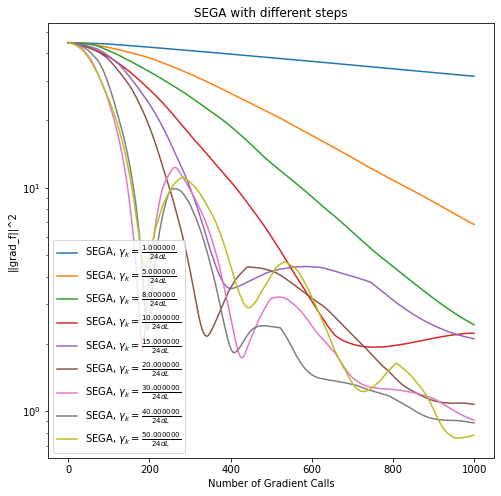

In [137]:
#SEGA learning rate
x, y, label = [], [], []
n_iter = 1000

def gamma_sega_th(k, f, grad_f, x_k, x_true, args):
        return args['c']/(24 * args['L'] * args['d'])

def l2_prox(x, k, args):
    gamma = gamma_sega_th(None, None, None, None, None, args)
    alpha = np.max((1 - gamma * args['lambda'] / np.linalg.norm(x, ord=2)), 0)
    return alpha * x

c_arr = [1, 5, 8, 10, 15, 20, 30, 40, 50]
for args['c'] in c_arr: 
    operations_sega = [i for i in range(n_iter)]

    sega = opt.GradientOptimizer(f, grad_f, gamma_k = gamma_sega_th, 
                            criterium = '||grad_f(x_k)||', x_0 = w_0, n_iter = n_iter, args = args, sega_activate = True,
                            grad_f_j = grad_f_j, is_independent = True, 
                            acc_k=acc, prox_activate=True, prox_func=l2_prox)
    points_arr, differences_arr, times_arr, acc_arr = sega.descent()

    x.append(operations_sega)
    y.append(differences_arr)
    label.append(r"SEGA, $\gamma_k = \frac{%f}{24dL}$" % args['c'])

opt.plot_graphs(x, y, "Number of Gradient Calls", label, "SEGA with different steps", logscale = True, criteria_type = "||grad_f||^2")
    

100%|██████████| 10000/10000 [02:03<00:00, 81.17it/s]


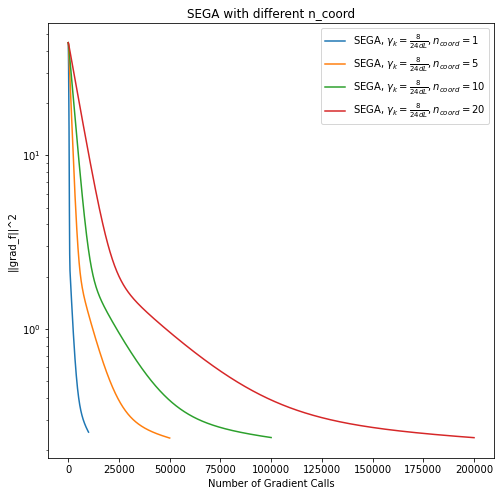

In [138]:
#SEGA n_coord
x, y, label = [], [], []
n_iter = 10000

def gamma_sega_th(k, f, grad_f, x_k, x_true, args):
        return 8/(24 * args['L'] * args['d'])

def l2_prox(x, k, args):
    gamma = gamma_sega_th(None, None, None, None, None, args)
    alpha = np.max((1 - gamma * args['lambda'] / np.linalg.norm(x, ord=2)), 0)
    return alpha * x

n_coord_arr = [1, 5, 10, 20]
for n_coord in n_coord_arr: 
    operations_sega = [i*n_coord for i in range(n_iter)]

    sega = opt.GradientOptimizer(f, grad_f, gamma_k = gamma_sega_th, 
                            criterium = '||grad_f(x_k)||', x_0 = w_0, n_iter = n_iter, args = args, sega_activate = True,
                            grad_f_j = grad_f_j, is_independent = True, n_coord=n_coord,
                            acc_k=acc, prox_activate=True, prox_func=l2_prox)
    points_arr, differences_arr, times_arr, acc_arr = sega.descent()

    x.append(operations_sega)
    y.append(differences_arr)
    label.append(r"SEGA, $\gamma_k = \frac{8}{24dL}, n_{coord} = %i$" % (n_coord))

opt.plot_graphs(x, y, "Number of Gradient Calls", label, "SEGA with different n_coord", logscale = True, criteria_type = "||grad_f||^2")
    

100%|██████████| 10000/10000 [01:16<00:00, 130.25it/s]


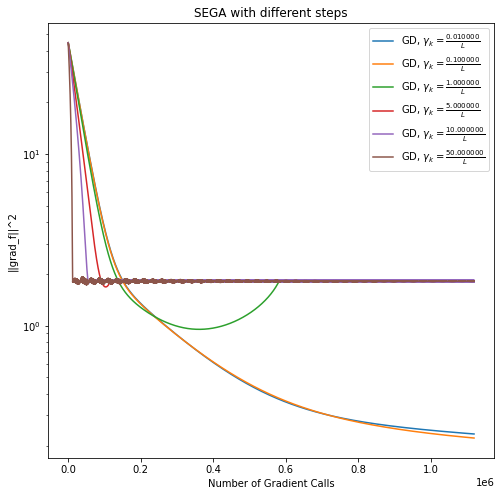

In [162]:
#SEGA learning rate
x, y, label = [], [], []
n_iter = 10000

def gamma_gd(k, f, grad_f, x_k, x_true, args):
        return args['c']/(args['L'])

def l2_prox(x, k, args):
    gamma = gamma_gd(None, None, None, None, None, args)
    alpha = np.max((1 - gamma * args['lambda'] / np.linalg.norm(x, ord=2)), 0)
    return alpha * x

c_arr = [0.01, 0.1, 1, 5, 10, 50]
for args['c'] in c_arr: 
    operations_gd = [i*args['d'] for i in range(n_iter)]

    gd = opt.GradientOptimizer(f, grad_f, gamma_k = gamma_sega_th, 
                        criterium = '||grad_f(x_k)||', x_0 = w_0, n_iter = n_iter, args = args,
                        grad_f_j = grad_f_j, acc_k=acc, prox_activate=True, prox_func=l2_prox)
    points_arr, differences_arr, times_arr, acc_arr = gd.descent()

    x.append(operations_gd)
    y.append(differences_arr)
    label.append(r"GD, $\gamma_k = \frac{%f}{L}$" % args['c'])

opt.plot_graphs(x, y, "Number of Gradient Calls", label, "GD with different steps", logscale = True, criteria_type = "||grad_f||^2")

__(в)__ Постройте графики сравнения всех методов: по оси $x$ используйте время или количество арифметических операций, по оси $y$ - $\|\nabla f(x^k)\|$ или точность на тесте. Таким образом, всего 4 графика. Сделайте сравнение и вывод.

Algorithms parameters:
- CSGD: $b$ = 20, $\gamma = \frac{700}{4Ld}$
- SEGA: $b$ = 1, $\gamma = \frac{8}{24Ld}$
- GD: $\gamma = \frac{0.1}L$

In [167]:
times_list, grad_call_list, differences_list, acc_list, labels_list = [], [], [], [], []

In [168]:
#GD
x, y, label = [], [], []
n_iter = 10000

def gamma_gd(k, f, grad_f, x_k, x_true, args):
        return 0.1/(args['L'])

def l2_prox(x, k, args):
    gamma = gamma_gd(None, None, None, None, None, args)
    alpha = np.max((1 - gamma * args['lambda'] / np.linalg.norm(x, ord=2)), 0)
    return alpha * x

operations_gd = [i*args['d'] for i in range(n_iter)]

gd = opt.GradientOptimizer(f, grad_f, gamma_k = gamma_sega_th, 
                        criterium = '||grad_f(x_k)||', x_0 = w_0, n_iter = n_iter, args = args,
                        grad_f_j = grad_f_j, acc_k=acc, prox_activate=True, prox_func=l2_prox)
points_arr, differences_arr, times_arr, acc_arr = gd.descent()

times_list.append(times_arr)
grad_call_list.append(operations_gd)
differences_list.append(differences_arr)
acc_list.append(acc_arr)
labels_list.append(r"GD, $\gamma_k = \frac{1}{L}$")

100%|██████████| 10000/10000 [01:04<00:00, 154.68it/s]


In [169]:
#csgd
n_iter = 10000
x, y, label = [], [], []
n_coord = 20

def gamma_csgd(k, func, nabla_f, x_curr, x_sol, args):
    return 700/(4 * args['L'] * args['d'])

def l2_prox(x, k, args):
    gamma = gamma_csgd(None, None, None, None, None, args)
    alpha = np.max(1 - gamma * args['lambda'] / np.linalg.norm(x, ord=2), 0)

    return alpha * x

csgd_grad_call_per_iter = n_coord
csgd_n_iter = n_iter // csgd_grad_call_per_iter
csgd_grad_calls = [i*csgd_grad_call_per_iter for i in range(csgd_n_iter)]

csgd = opt.GradientOptimizer(f, grad_f, gamma_k = gamma_csgd, 
                            criterium = '||grad_f(x_k)||', x_0 = w_0, args = args, csgd_activate = True, 
                            n_coord = n_coord, n_iter=csgd_n_iter,
                            grad_f_j = grad_f_j, is_independent = True, 
                            acc_k=acc, prox_activate=True, prox_func=l2_prox)

points_arr, differences_arr, times_arr, acc_arr = csgd.descent()

times_list.append(times_arr)
grad_call_list.append(csgd_grad_calls)
differences_list.append(differences_arr)
acc_list.append(acc_arr)
labels_list.append(r"CSGD, $n_{coord} = 20$")

100%|██████████| 500/500 [00:03<00:00, 142.87it/s]


In [170]:
#SEGA
x, y, label = [], [], []
n_iter = 10000
n_coord = 1

def gamma_sega_th(k, f, grad_f, x_k, x_true, args):
        return 8/(24 * args['L'] * args['d'])

def l2_prox(x, k, args):
    gamma = gamma_sega_th(None, None, None, None, None, args)
    alpha = np.max((1 - gamma * args['lambda'] / np.linalg.norm(x, ord=2)), 0)
    return alpha * x

operations_sega = [i*n_coord for i in range(n_iter)]

sega = opt.GradientOptimizer(f, grad_f, gamma_k = gamma_sega_th, 
                        criterium = '||grad_f(x_k)||', x_0 = w_0, n_iter = n_iter, args = args, sega_activate = True,
                        grad_f_j = grad_f_j, is_independent = True, n_coord=n_coord,
                        acc_k=acc, prox_activate=True, prox_func=l2_prox)
points_arr, differences_arr, times_arr, acc_arr = sega.descent()

times_list.append(times_arr)
grad_call_list.append(operations_sega)
differences_list.append(differences_arr)
acc_list.append(acc_arr)
labels_list.append(r"SEGA, $\gamma_k = \frac{8}{24dL}, n_{coord} = 1$")

100%|██████████| 10000/10000 [01:32<00:00, 108.49it/s]


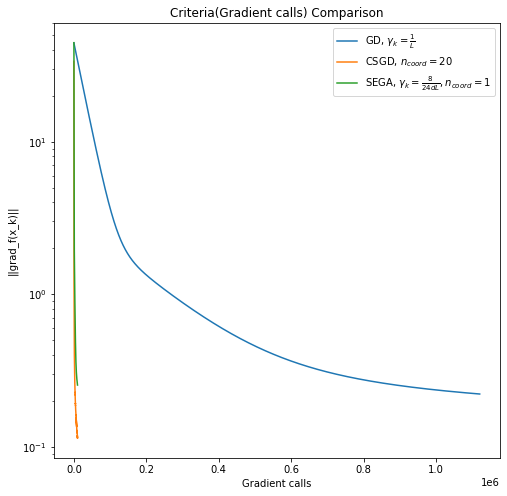

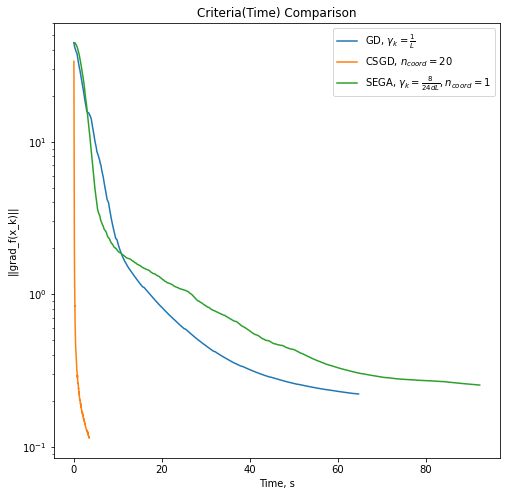

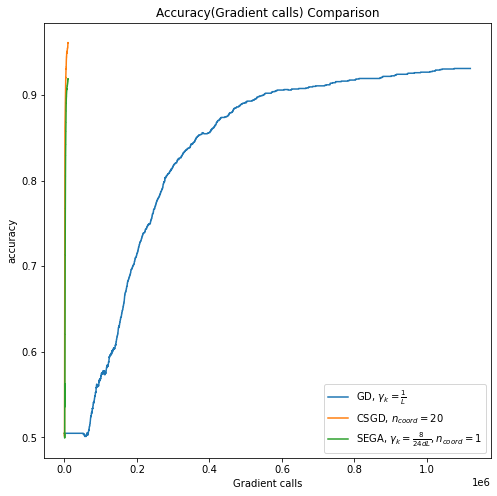

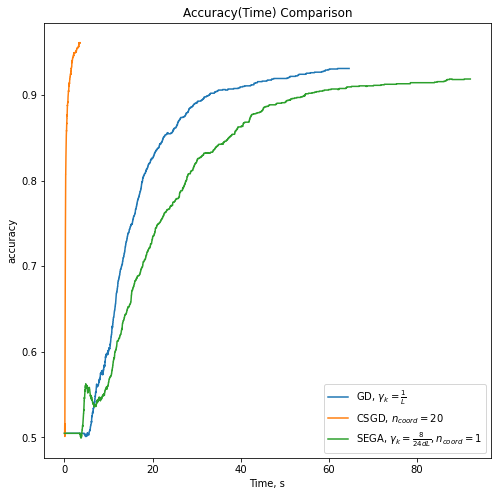

In [171]:
opt.plot_graphs(grad_call_list, differences_list, x_label = "Gradient calls", 
                lines_labels = labels_list, title = 'Criteria(Gradient calls) Comparison', logscale = True, 
                criteria_type = "||grad_f(x_k)||")

opt.plot_graphs(times_list, differences_list, x_label = "Time, s", 
                lines_labels = labels_list, title = 'Criteria(Time) Comparison', logscale = True, 
                criteria_type = "||grad_f(x_k)||")

opt.plot_graphs(grad_call_list, acc_list, x_label = "Gradient calls", 
                lines_labels = labels_list, title = 'Accuracy(Gradient calls) Comparison', logscale = False, 
                criteria_type = "accuracy")

opt.plot_graphs(times_list, acc_list, x_label = "Time, s", 
                lines_labels = labels_list, title = 'Accuracy(Time) Comparison', logscale = False, 
                criteria_type = "accuracy")

### Conclusion
- CSGD: Came out to be one of the best method both in terms of time, and in terms of grad calls
- SEGA: Better than basic gradient descent if we consider the number of gradients called, but mainly worse in terms of convergence and accuracies from time spent
- GD: the accuracy and convergence is okay, but the gradient calls are high because we send the whole gradient

__Бонусные пункты__

__(г)__ Попробуйте объеденить подходы SAGA/SVRG/L-SVRG и координатный SGD/SEGA (т.е. могут получиться пары SAGA + координатный, SVRG + SEGA и еще четыре других). Вам достаточно выбрать одну пару. Как при этом будет выглядеть итерация метода (запишите в явном виде)? Докажите сходимость данного подхода для $\mu$-сильно выпуклой $f$ и $L$-гладкой $f_i$.

__(д)__ Реализуйте новый метод. Сравните его с двумя методами, которые были взяты за базу, на задаче линейной регресии. Способы сравнения методов придумайте самостоятельно. Сделайте вывод.